## 图像特征提取

### HOG

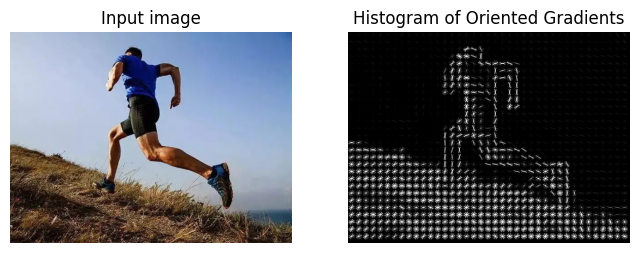

In [1]:
import matplotlib.pyplot as plt
import skimage

image = skimage.io.imread("run_man.jpg")
#提取HOG
fd, hog_image = skimage.feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
#图像像素范围裁剪并归一化
hog_image_rescaled = skimage.exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### SIFT

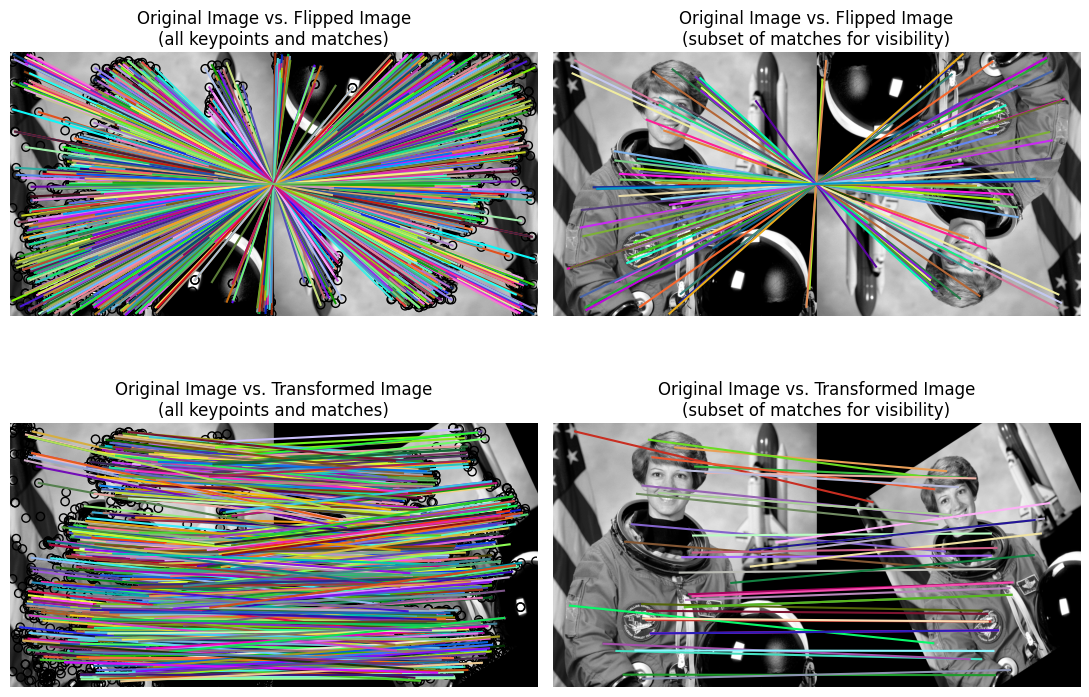

In [2]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img1 = rgb2gray(data.astronaut())
#图像旋转
img2 = transform.rotate(img1, 180)
#图像变换
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)
#SIFT模型
descriptor_extractor = SIFT()
#提取特征
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors
#特征匹配
matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, max_ratio=0.6,
                              cross_check=True)
#绘制匹配结果
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Original Image vs. Flipped Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Original Image vs. Transformed Image\n"
                   "(all keypoints and matches)")
#绘制匹配结果的子集，以便于展示
plot_matches(ax[0, 1], img1, img2, keypoints1, keypoints2, matches12[::15],
             only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1, 1], img1, img3, keypoints1, keypoints3, matches13[::15],
             only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout()
plt.show()

### 边缘检测

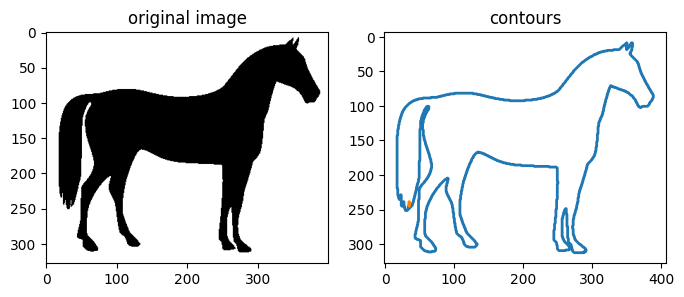

In [3]:
import matplotlib.pyplot as plt
import skimage 
image = skimage.data.horse()
#提取轮廓
contours = skimage.measure.find_contours(image, 0.5)
#绘图
fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(image,plt.cm.gray)
ax0.set_title('original image')
rows,cols=image.shape
ax1.axis([0,rows,cols,0])
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('image')
ax1.set_title('contours')
plt.show()

## 角点检测 

Text(0.5, 1.0, 'corners')

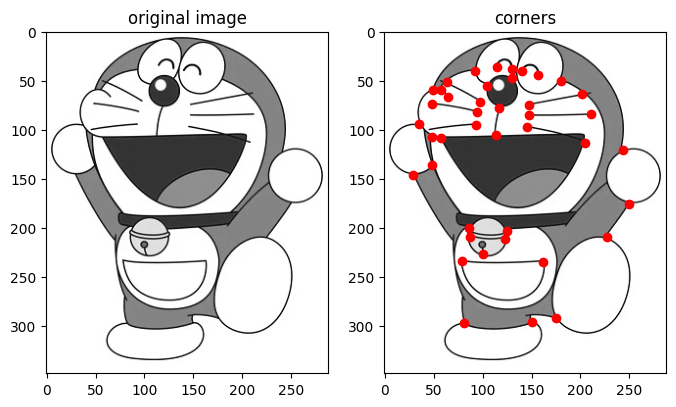

In [4]:
import numpy as np  
from skimage.feature import corner_harris, corner_peaks  
from skimage.color import rgb2gray  
import matplotlib.pyplot as plt  
import skimage.io as io  
   
image = io.imread('Doraemon.jpg')  
image = rgb2gray(image) 

fig, axes = plt.subplots(1,2,figsize=(8,8))
ax0, ax1= axes.ravel()
ax0.imshow(image,plt.cm.gray)
ax0.set_title('original image')
#提取角点并显示
corners = corner_peaks(corner_harris(image), min_distance=6, threshold_rel=0.1)  
ax1.imshow(image, plt.cm.gray)  
y_corner, x_corner = zip(*corners)  
ax1.plot(x_corner, y_corner, 'or')  
ax1.set_title('corners')